Calculated 2D Coordinates:
[[ 1323.64085785   -23.02653624]
 [ 2786.45299794 -1516.39764174]
 [ -616.09425413   601.72441768]
 [-3020.24115256  -604.14804696]
 [-1099.07066664  2670.25900435]
 [ -247.96632497    19.05890068]
 [ -436.11316427  -480.01442618]
 [ 1973.65842437  2054.23729521]
 [ -322.56691728 -2714.40406644]
 [ -341.69980183    -7.28887662]]


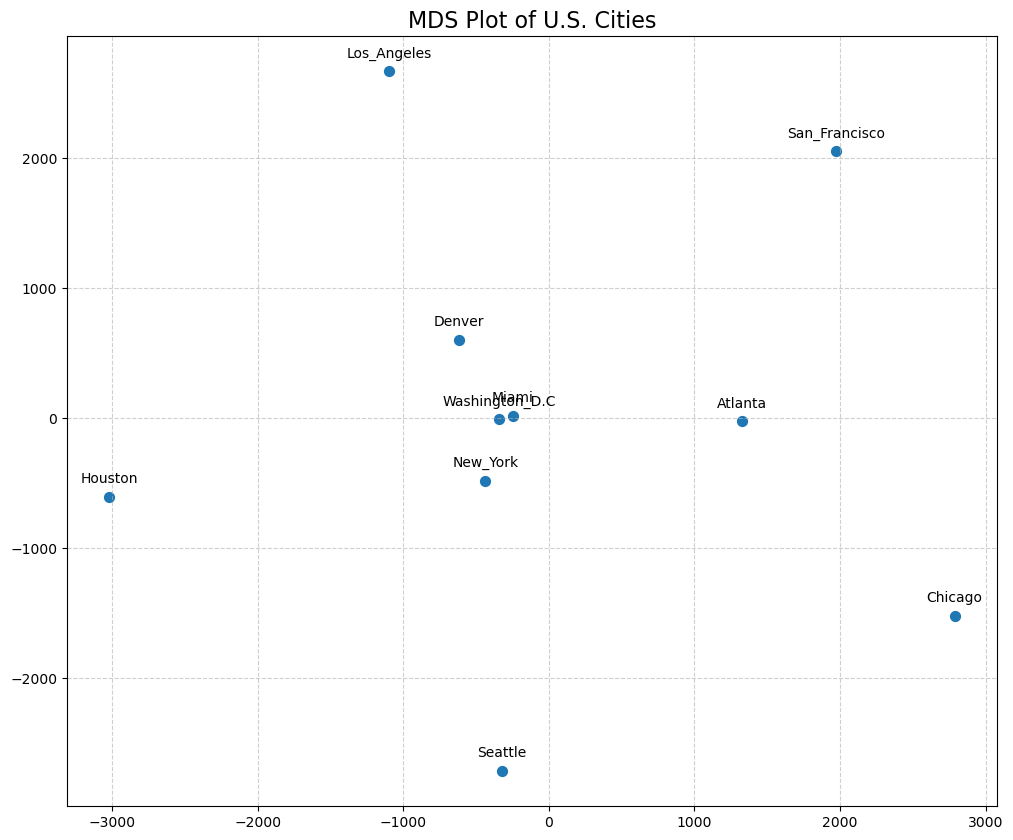

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# --- Step 1: Create the distance matrix ---
city_names = [
    "Atlanta", "Chicago", "Denver", "Houston", "Los_Angeles", "Miami",
    "New_York", "San_Francisco", "Seattle", "Washington_D.C"
]
dist_matrix = pd.DataFrame(0, index=city_names, columns=city_names)
lower_triangle_data = [
    587, 1212, 701, 1936, 604, 748, 2139, 2182, 543,
    920, 940, 1745, 1188, 713, 1858, 1737, 597,
    879, 831, 1726, 1631, 949, 1021, 1494,
    1374, 968, 1420, 1645, 1891, 1220,
    2339, 2451, 347, 959, 2300,
    1092, 2594, 2734, 923,
    2571, 2408, 205,
    678, 2442,
    2329
]
lower_indices = np.tril_indices(10, k=-1)
dist_matrix.iloc[lower_indices] = lower_triangle_data
dist_matrix = dist_matrix + dist_matrix.T

# --- Step 2: Perform Classical (Metric) MDS ---
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, n_init=4, normalized_stress=False)
mds_coords = mds.fit_transform(dist_matrix)

# (Optional) Print the coordinates to see the data range
print("Calculated 2D Coordinates:")
print(mds_coords)

# --- Step 3: Plot the results (Revised) ---
fig, ax = plt.subplots(figsize=(12, 10))

# First, draw points for each city's location. This helps set the plot boundaries.
ax.scatter(mds_coords[:, 0], mds_coords[:, 1], s=50)

# Now, add the city names as labels for each point.
for i, city in enumerate(city_names):
    ax.annotate(city, (mds_coords[i, 0], mds_coords[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Set the plot title
ax.set_title("MDS Plot of U.S. Cities", fontsize=16)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()